<a href="https://colab.research.google.com/github/PinnaSaiVarun/saivarun_INFO5731_-Fall2021/blob/main/In_class_exercise_05_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 11/11/2021)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731_spring2021/blob/main/class_exercises/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [1]:
# Write your code here
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np



In [2]:
try:
    from xgboost import XGBClassifier
except ImportError ('Installing XGBoost...'):
    !pip install xgboost

In [5]:
data_train = pd.read_csv(r'/content/stsa-train.txt',sep = 'delimiter=',header= None,names=['review'])
data_test = pd.read_csv(r'/content/stsa-test.txt',sep = 'delimiter=',header= None,names=['review'])

data_train[['sentiment','review']] = data_train["review"].str.split(" ", 1, expand=True)
data_test[['sentiment','review']] = data_test["review"].str.split(" ", 1, expand=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [6]:
data_train.head()

,review,sentiment
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [7]:
data_test.head()

,review,sentiment
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1


In [8]:
with open('/content/stsa-train.txt') as fin:
    data = fin.readlines()
with open('/content/stsa-test.txt') as fin:
    data.extend(fin.readlines())
sentiment = [x[0] for x in data]
review = [x.strip()[2:] for x in data]
df = pd.DataFrame({'review' : review, 'sentiment': sentiment})

In [ ]:
#TEXT PROCESSING

In [9]:
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [10]:

def data_cleaning(data):
  data="".join([word.lower() for word in data if word not in string.punctuation])
  data = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", data)
  tokens = re.split('\W+',data)
  data = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return data

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer = data_cleaning)
X_tfidf = tfidf.fit_transform(data_train['review'])
print(X_tfidf.shape)

(6920, 13343)


In [12]:
X_tfidf=pd.DataFrame(X_tfidf.toarray())
X_tfidf.columns=tfidf.get_feature_names()
X_tfidf.head()

,,100minute,103minute,10course,10th,10thgrade,10year,10yearold,112minute,12,129minute,12th,12yearold,13th,14yearold,15th,15year,168minute,18yearold,1930s,1940s,1950s,1960s,1970s,1980s,19th,19thcentury,20car,20th,21st,22yearold,24andunders,26yearold,2day,30,34th,37minute,3d,3yearolds,40,...,yuen,yung,yvan,zaidan,zany,zap,zaza,zboys,zeal,zealand,zealously,zeitgeist,zelda,zellweger,zemeckis,zen,zero,zerodimensional,zeus,zhang,zhao,zhuangzhuang,zigzag,zing,zinger,zingerfilled,zip,zipper,zippy,zishe,ziyi,zoe,zombie,zombieland,zone,zoning,zoom,zwick,zzzzzzzzz,élan
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.048154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.029784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.049596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.048782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
test_tfidf = tfidf.transform(data_test['review'])
print(test_tfidf.shape)

(1821, 13343)


In [14]:
#splittind data into test and train data
x_train, x_test, y_train, y_test = train_test_split(X_tfidf, data_train['sentiment'].values,
                                                test_size=0.2, random_state=1)

In [15]:
naive_bayes = MultinomialNB()
svc = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
algos = [naive_bayes, svc, knn, dt, rf, xgb]
cut = ['nb', 'svc', 'knn', 'dt', 'rf', 'xgb']
estimators = []
for name, model in zip(cut, algos):
    cv = Pipeline([('vect', CountVectorizer()), (name,model)])
    estimators.append(cv)

In [16]:
model = naive_bayes.fit(x_train,y_train)

In [17]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [18]:
# Accuracy using Multinomial algorithm

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(naive_bayes, x_test, y_test, cv=18)
y_pred_naive_bayes = model.predict(x_test)
print("The accuracy for Multinomial",accuracy.mean())
print('accuracy %s' % accuracy_score(y_pred_naive_bayes,y_test))
print(classification_report(y_test,y_pred_naive_bayes))

The accuracy for Multinomial 0.7210735171261488
accuracy 0.7695086705202312
              precision    recall  f1-score   support

           0       0.81      0.69      0.74       675
           1       0.74      0.85      0.79       709

    accuracy                           0.77      1384
   macro avg       0.78      0.77      0.77      1384
weighted avg       0.77      0.77      0.77      1384



In [19]:
#Accuracy using decision tree
model1= dt.fit(x_train,y_train)

In [20]:
y_pred_decision_tree = model1.predict(x_test)
accuracy = cross_val_score(dt, x_test, y_test, cv=10)
print('accuracy' % accuracy_score(y_pred_decision_tree,y_test))
print(classification_report(y_test,y_pred_decision_tree))
print("The accuracy for decision trees",accuracy.mean())

accuracy
              precision    recall  f1-score   support

           0       0.62      0.57      0.59       675
           1       0.62      0.66      0.64       709

    accuracy                           0.62      1384
   macro avg       0.62      0.62      0.61      1384
weighted avg       0.62      0.62      0.62      1384

The accuracy for decision trees 0.5765926389323324


In [21]:
#accuracy using KNeighbours
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(knn, x_test, y_test, cv=10)
model2 = knn.fit(x_train,y_train)
y_pred_knn= model2.predict(x_test)
print('accuracy' % accuracy_score(y_pred_knn,y_test))
print(classification_report(y_test,y_pred_knn))
print("The accuracy using knn",accuracy.mean())

accuracy
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       675
           1       0.70      0.74      0.72       709

    accuracy                           0.71      1384
   macro avg       0.71      0.71      0.71      1384
weighted avg       0.71      0.71      0.71      1384

The accuracy using knn 0.6633041392972578


In [22]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(svc, x_test, y_test, cv=10)
print("using svm",accuracy.mean())
model3 = svc.fit(x_train,y_train)
y_pred_svc = model3.predict(x_test)
print(' The accuracy using svc %s' % accuracy_score(y_pred_svc,y_test))
print(classification_report(y_test,y_pred_svc))

using svm 0.7066416432071734
 The accuracy using svc 0.7673410404624278
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       675
           1       0.76      0.80      0.78       709

    accuracy                           0.77      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.77      0.77      0.77      1384



In [23]:
#accuracy using random forest
model4 = rf.fit(x_train,y_train)
y_pred_rf = model4.predict(x_test)
accuracy = cross_val_score(rf, x_test, y_test, cv=10)
print('The accuracy using random forest' % accuracy_score(y_pred_rf,y_test))
print(classification_report(y_test,y_pred_rf))
print("using random forest",accuracy.mean())

The accuracy using random forest
              precision    recall  f1-score   support

           0       0.70      0.63      0.67       675
           1       0.68      0.75      0.71       709

    accuracy                           0.69      1384
   macro avg       0.69      0.69      0.69      1384
weighted avg       0.69      0.69      0.69      1384

using random forest 0.6611510791366906


In [24]:
#accuracy using XG boost
model_xgb = xgb.fit(x_train,y_train)
y_pred_xgb = model_xgb.predict(x_test)
accuracy = cross_val_score(xgb, x_test, y_test, cv=10)
print('Accuracy %s' % accuracy_score(y_pred_xgb,y_test))
print(classification_report(y_test,y_pred_xgb))
print("The accuracy using XG boost",accuracy.mean())

Accuracy 0.6213872832369942
              precision    recall  f1-score   support

           0       0.72      0.37      0.49       675
           1       0.59      0.86      0.70       709

    accuracy                           0.62      1384
   macro avg       0.65      0.62      0.59      1384
weighted avg       0.65      0.62      0.60      1384

The accuracy using XG boost 0.6206808466270461


In [ ]:
From the above results we can see that Multinomial algoritham has best best accuracy and precision results.


In [26]:
#Evaluating test data

test_data_naive_bayes = model.predict(X_tfidf)
print('The accuracy on test data using Multinonial %s' % accuracy_score(test_data_naive_bayes,data_train['sentiment']))
print(classification_report(test_data_naive_bayes,data_train['sentiment']))

The accuracy on test data using Multinonial 0.9119942196531792
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3091
           1       0.95      0.89      0.92      3829

    accuracy                           0.91      6920
   macro avg       0.91      0.91      0.91      6920
weighted avg       0.91      0.91      0.91      6920



(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [28]:
#Write your code here.
import re
import nltk
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')
%matplotlib inline
dataset = pd.read_csv('Amazon_Unlocked_Mobile.csv')

dataset.head()



,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,Great phone to replace my lost phone. The only...,0.0


In [29]:
print(f'Number of reviews {dataset.shape[0]}')
dataset.isnull().sum()

Number of reviews 236563


Product Name        0
Brand Name      34365
Price            2829
Rating              1
Reviews            37
Review Votes     7248
dtype: int64

In [30]:
dataset['Reviews'].head()


0    I feel so LUCKY to have found this used (phone...
1    nice phone, nice up grade from my pantach revu...
2                                         Very pleased
3    It works good but it goes slow sometimes but i...
4    Great phone to replace my lost phone. The only...
Name: Reviews, dtype: object

In [31]:
import re
dataset['Reviews']=dataset['Reviews'].map(lambda x: re.sub('[?|!|\'|"|#]', '', str(x)))
dataset['Reviews']=dataset['Reviews'].map(lambda x: x.lower())
dataset['Reviews'].head()

0    i feel so lucky to have found this used (phone...
1    nice phone, nice up grade from my pantach revu...
2                                         very pleased
3    it works good but it goes slow sometimes but i...
4    great phone to replace my lost phone. the only...
Name: Reviews, dtype: object

In [32]:
def tolist( review, remove_stopwords=True):
    
    text = re.sub("[^a-zA-Z]"," ", review)
    words = text.lower().split()    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    x=[]
    stemmer = english_stemmer 
    for word in words:
        x.append(stemmer.stem(word))
    return(x)

In [33]:
import nltk
nltk.download('stopwords')
clean_data_reviews = []
for review in dataset['Reviews']:
    clean_data_reviews.append( " ".join(tolist(review)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectors = TfidfVectorizer(stop_words='english')
S = vectors.fit_transform(clean_data_reviews)
true_k = 10
text = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
text.fit(S)

print("most repeated words in cluster:")
order_centroids = text.cluster_centers_.argsort()[:, ::-1]
terms = vectors.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("analysis")

most repeated words in cluster:
Cluster 0:
 good
 product
 like
 nice
 love
 iphon
 expect
 use
 phone
 watch
Cluster 1:
 excel
 product
 phone
 thank
 recommend
 condit
 good
 seller
 price
 love
Cluster 2:
 phone
 use
 great
 love
 good
 like
 batteri
 screen
 new
 price
Cluster 3:
 excelent
 producto
 gracia
 recomendado
 telefono
 bueno
 celular
 muy
 product
 servicio
Cluster 4:
 work
 phone
 great
 fine
 good
 new
 doesnt
 stop
 like
 perfect
Cluster 5:
 fast
 ship
 great
 phone
 good
 deliveri
 product
 love
 price
 work
Cluster 6:
 perfect
 work
 condit
 phone
 everyth
 thank
 new
 product
 great
 love
Cluster 7:
 ok
 thank
 good
 everyth
 phone
 love
 great
 expect
 product
 work
Cluster 8:
 great
 love
 phone
 work
 product
 price
 condit
 buy
 iphon
 deal
Cluster 9:
 good
 phone
 product
 price
 far
 work
 qualiti
 deal
 realli
 buy


analysis


In [35]:
Y = vectors.transform(["the phone works good"])
analysis = text.predict(Y)
print(analysis)

Y = vectors.transform(["great phone to use"])
analysis = text.predict(Y)
print(analysis)

[9]
[8]


In [ ]:
DB SCAN


In [36]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import gensim

In [37]:
Reviews_data=[]
for t in dataset['Reviews']:
  Reviews_data.append(t.split())
import gensim
w2v_model=gensim.models.Word2Vec(Reviews_data, size=10, workers=4)

In [38]:
data_vectors = []
for t in Reviews_data:
    vector = np.zeros(100)
    words = 0
    for word in t:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            words += 1
        except:
            pass
    vector /= words
    data_vectors.append(vector)
    
data_vectors = np.array(data_vectors)
data_vectors = np.nan_to_num(data_vectors)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [39]:
from sklearn.cluster import DBSCAN
minPts = 2 * 100

def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l
def compute200thnearestneighbour(x, data): # Returns the distance of 200th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 200 and dists[199] > dist): # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]

In [40]:
data_vectors.shape

(236563, 100)

In [41]:

twohundrethneigh = []
for val in data_vectors[:500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, data_vectors[:500]))
twohundrethneigh.sort()

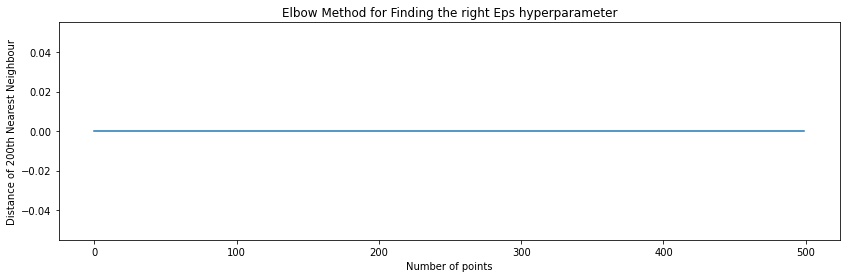

In [42]:
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [ ]:
#You can write you answer here. (No code needed)
## K-means is a clustering algorithm that uses centroid based or partion based clustering. The algorithm divides the sample 
space into K groups based on their similarity. The euclidian distance is used to access similarity.DBScan is a clustering algorithm depends
on density. The main feature of this algorithm is that each point is acluster must have minimum number of neighbours
within a given radius.The alogorithm is shown to be very effective at identifying outliers and noises.Hierarchial
clustering is a algorithm that divides objects into clusters based on their similarity.The endpoint is a set of clusters, 
each of which is distinct from others while articrafts within cluster are broadly identified.

